In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,10)})
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
!pip install datasist
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df = pd.read_csv('/content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,no,N
1,2/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,no,N
2,3/12/2008,albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,no,Y
3,4/12/2008,albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,no,No
4,5/12/2008,albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,no,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145440 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

- We have missing values

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Dealing with missing values

In [7]:
df.isna().sum() / len(df)*100

Date              0.000000
Location          0.013749
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [8]:
df.isna().sum() / len(df)*100

Date              0.000000
Location          0.013749
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [9]:
# let's drop na values in location
df.dropna(axis=0, subset=['Location'], inplace=True)

### Categories data

In [10]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[df.columns[df.dtypes=='object']] = cat_imputer.fit_transform(df[df.columns[df.dtypes=='object']])

### Numerical data

In [11]:
num_imputer = KNNImputer(n_neighbors=3)
df[df.columns[df.dtypes!='object']] = num_imputer.fit_transform(df[df.columns[df.dtypes!='object']])

In [12]:
df.isna().sum() / len(df)*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

no missing values

## Convert Categories data

In [13]:
# from date convert to day, month
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month

In [14]:
# drop date
df.drop('Date', axis=1, inplace=True)

### label encoding

In [15]:
encoder = OrdinalEncoder()
encoder.fit(df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']])
df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']] = encoder.transform(df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']])

In [16]:
df['RainToday'] = df['RainToday'].apply(lambda s : 1 if s=='yes' or s=='Yes' else 0)

In [17]:
df['RainToday'].value_counts()

0    113569
1     31871
Name: RainToday, dtype: int64

In [18]:
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda s : 1 if s=='Yes' or s=='Y' else 0)

In [19]:
df['RainTomorrow'].value_counts()

0    113571
1     31869
Name: RainTomorrow, dtype: int64

In [20]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month'],
      dtype='object')

## Detect outliers

In [21]:
for i in ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + IQR * 1.5
    down = Q1 - IQR * 1.5

    values = df[i].apply(lambda val:val if val < upper and val > down else 0)
    
    indecs = detect_outliers(df, n=0, features=[i])
    df.loc[indecs, i] = values.mean()

In [22]:
x = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [23]:
y.value_counts()

0    113571
1     31869
Name: RainTomorrow, dtype: int64

## Split data

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

## Scale the data

In [25]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Over sample the data

In [26]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(x_train, y_train)

## Apply model
#### from analysis the data we notice 
- not all features linearly correlated so, exclude logistic regression
- there is some Overlapping in data so, exclude K neighbor classifier
- algo with tree based is  a good choice for this data

In [42]:
models = {
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(eval_metric='mlogloss')
}

In [43]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {model.score(X_resampled, y_resampled)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print('-'*30)

Training Model DT 
--------------
Training Accuracy: 0.9999889936933863
Testing Accuracy: 0.7834502200220022
Testing Confusion Matrix: 
[[19567  3147]
 [ 3152  3222]]
------------------------------
Training Model RF 
--------------
Training Accuracy: 0.9999889936933863
Testing Accuracy: 0.8518633113311331
Testing Confusion Matrix: 
[[21173  1541]
 [ 2768  3606]]
------------------------------
Training Model XGB 
--------------
Training Accuracy: 0.7855201030190299
Testing Accuracy: 0.7859254675467546
Testing Confusion Matrix: 
[[17924  4790]
 [ 1437  4937]]
------------------------------


In [44]:
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [45]:
print("score in training data : ",model.score(X_resampled, y_resampled))
pred = model.predict(x_test)
print("score in testing data : ",accuracy_score(y_test, pred))

score in training data :  0.9999889936933863
score in testing data :  0.8522414741474147


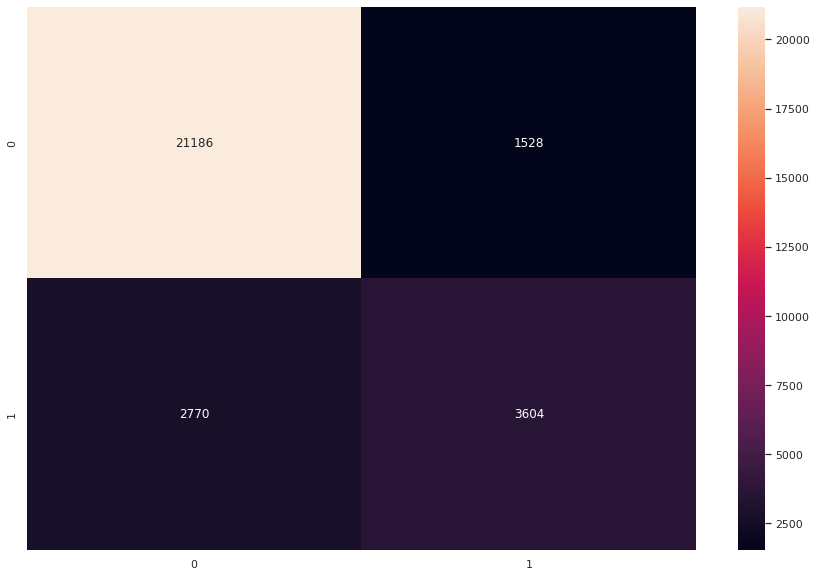

In [46]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='1');